 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [39]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline
#import quandl

SyntaxError: invalid syntax (Temp/ipykernel_19588/3771220078.py, line 8)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whales_path = Path("Resources/whale_returns.csv")
whales_data = pd.read_csv(whales_path,index_col="Date", infer_datetime_format=True, parse_dates=True)

In [5]:
# Count nulls
whales_data.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [6]:
# Drop nulls
whales_data = whales_data.dropna()
whales_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_path,index_col="Date", infer_datetime_format=True, parse_dates=True)

In [8]:
# Count nulls
algo_returns_data.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [9]:
# Drop nulls
algo_returns_data = algo_returns_data.dropna()
algo_returns_data.isnull().sum()
algo_returns_data.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("Resources/sp500_history.csv")
sp500_history_data = pd.read_csv(sp500_history_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
sp500_history_data.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_history_data['Close'] = sp500_history_data['Close'].str.replace("$","")

sp500_history_data.head
#sp500_history_data = sp500_history_data.astype('float64')

C:\Users\johng\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


<bound method NDFrame.head of               Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06
...             ...
2012-10-05  1460.93
2012-10-04  1461.40
2012-10-03  1450.99
2012-10-02  1445.75
2012-10-01  1444.49

[1649 rows x 1 columns]>

In [13]:
# Calculate Daily Returns
sp500_history_data['Close'] = pd.to_numeric(sp500_history_data['Close'], errors='coerce')
sp500_history_data.dtypes
sp500_history_returns = sp500_history_data.pct_change()
sp500_history_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Drop nulls
sp500_history_returns.dropna()
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
#df.rename(columns={"A": "a", "B": "c"})
sp500_history_returns=sp500_history_returns.rename(columns={"Close":"SP500"})
sp500_history_returns.head()

,SP500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([algo_returns_data,whales_data,sp500_history_returns], axis="columns", join="inner")
combined_data.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

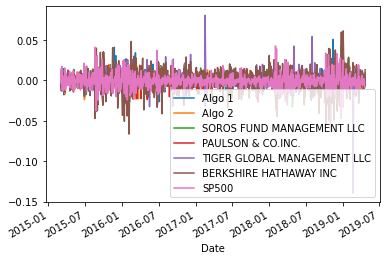

In [17]:
# Plot daily returns of all portfolios
combined_data.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

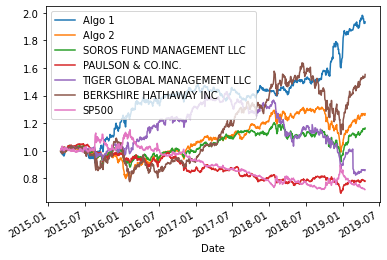

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

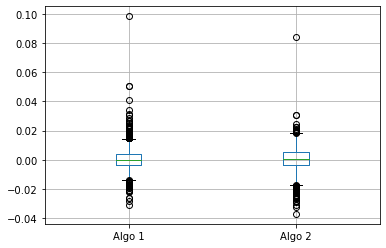

In [19]:
# Box plot to visually show risk
#algo_returns_data,whales_data,sp500_history_returns
algo_returns_data.boxplot()

<AxesSubplot:>

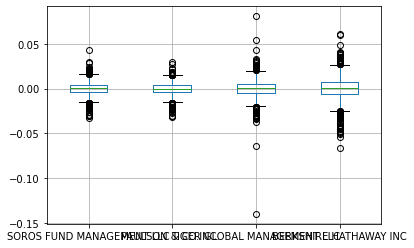

In [20]:
whales_data.boxplot()

<AxesSubplot:>

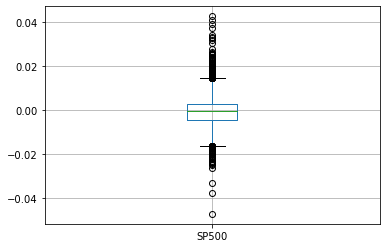

In [21]:
sp500_history_returns.boxplot()

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
#algo_returns_data,whales_data,sp500_history_returns
algo_returns_std =algo_returns_data.std()
whales_data_std = whales_data.std()

whales_data_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 500

#pd.to_numeric(sp500_history_data['Close'], errors='coerce')

SP500_std =pd.to_numeric(sp500_history_returns.std(), errors='coerce')
whales_data_std.head()

# Determine which portfolios are riskier than the S&P 500

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [26]:
for x, y in whales_data_std.items():
    stdev = float(y)
    SP500 = float(SP500_std)
    if stdev > SP500:
        print(x + " is riskier than the SP500")
        
for x, y in algo_returns_std.items():
    stdev = float(y)
    SP500 = float(SP500_std)
    if stdev > SP500:
        print(x + " is riskier than the SP500")

TIGER GLOBAL MANAGEMENT LLC is riskier than the SP500
BERKSHIRE HATHAWAY INC is riskier than the SP500
Algo 2 is riskier than the SP500


### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
algo_returns_std_annual = algo_returns_std[:]*np.sqrt(252)
whales_data_std_annual = whales_data_std[:]*np.sqrt(252)
SP500_std_annual = SP500_std*np.sqrt(252)
#print(algo_returns_std_annual,whales_data_std_annual,SP500_std_annual)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

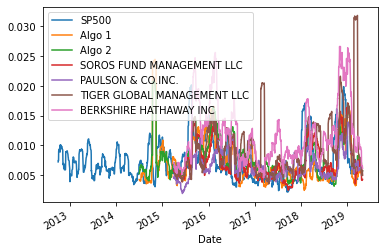

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling21_st_dev_algo_returns = algo_returns_data.rolling(window=21).std()
rolling21_st_dev_whales_data_std = whales_data.rolling(window=21).std()
rolling21_st_dev_SP500_std_annual = sp500_history_returns.rolling(window=21).std()
# Plot the rolling standard deviation

#rolling21_st_dev_SP500_std_annual

ax = rolling21_st_dev_SP500_std_annual.plot()
rolling21_st_dev_algo_returns.plot(ax=ax)
rolling21_st_dev_whales_data_std.plot(ax=ax)

### Calculate and plot the correlation

<AxesSubplot:>

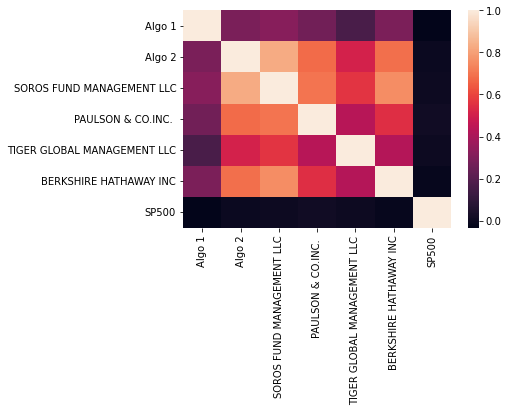

In [29]:
# Calculate the correlation
correlation = combined_data.corr()
# Display de correlation matrix
correlation.head()
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [36]:
# Calculate covariance of a single portfolio
covariance = whales_data['BERKSHIRE HATHAWAY INC'].cov(sp500_history_returns['SP500'])
# Computing beta
variance = whales_data['BERKSHIRE HATHAWAY INC'].var()

# Plot beta trend
beta =covariance / variance
beta



-0.009336829601298396

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

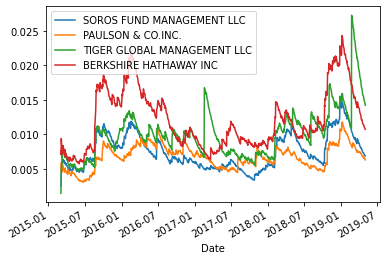

In [51]:
whale_ewm = whales_data.ewm(halflife=21,axis=0).std().plot()

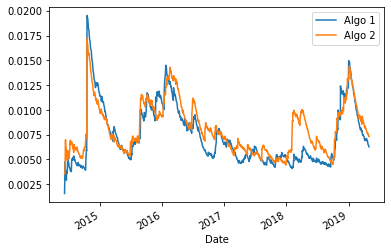

In [52]:
algo_returns_data_ewm = algo_returns_data.ewm(halflife=21,axis=0).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [286]:
# Annualized Sharpe Ratios
#sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios = (combined_data.mean()*252)/(combined_data.std() * np.sqrt(252))


<AxesSubplot:>

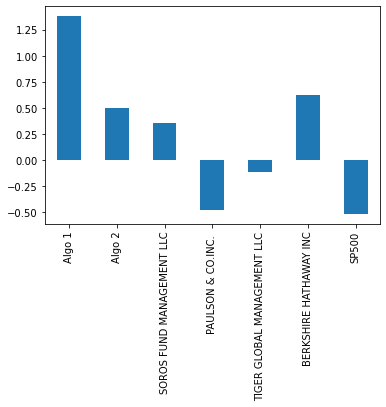

In [287]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

--- Yes, the algorithmic strategies outperform the whales and SP500 on average

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [305]:
# Reading data from 1st stock
stock1 = quandl.get("WIKI/AAPL")
stock1 = stock1['Close']
stock1.head()

Date
1980-12-12    28.75
1980-12-15    27.25
1980-12-16    25.25
1980-12-17    25.87
1980-12-18    26.63
Name: Close, dtype: float64

In [306]:
# Reading data from 2nd stock
stock2 = quandl.get("WIKI/F")
stock2 = stock2['Close']
stock2.head()

Date
1972-06-01    66.38
1972-06-02    66.25
1972-06-05    66.25
1972-06-06    65.50
1972-06-07    65.13
Name: Close, dtype: float64

In [307]:
# Reading data from 3rd stock
stock3 = quandl.get("WIKI/NRZ")
stock3 = stock3['Close']
stock3.head()

Date
2013-05-02    6.76
2013-05-03    6.75
2013-05-06    6.91
2013-05-07    7.10
2013-05-08    7.06
Name: Close, dtype: float64

In [319]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([stock1, stock2, stock3], axis="columns", join="inner")
combined_df.columns=['AAPL','F','NRZ']
combined_df.head()

,AAPL,F,NRZ
Date,,,
2013-05-02,445.520,13.41,6.76
2013-05-03,449.980,13.83,6.75
2013-05-06,460.710,14.09,6.91
2013-05-07,458.658,14.19,7.10
2013-05-08,463.840,14.21,7.06


In [320]:
# Reset Date index
combined_df.reset_index()

,Date,AAPL,F,NRZ
0,2013-05-02,445.520,13.41,6.76
1,2013-05-03,449.980,13.83,6.75
2,2013-05-06,460.710,14.09,6.91
3,2013-05-07,458.658,14.19,7.10
4,2013-05-08,463.840,14.21,7.06
...,...,...,...,...
1228,2018-03-21,171.270,11.10,17.02
1229,2018-03-22,168.845,10.75,16.76
1230,2018-03-23,164.940,10.56,16.49
1231,2018-03-26,172.770,10.83,16.66


In [321]:
# Reorganize portfolio data by having a column per symbol
combined_df.head()

,AAPL,F,NRZ
Date,,,
2013-05-02,445.520,13.41,6.76
2013-05-03,449.980,13.83,6.75
2013-05-06,460.710,14.09,6.91
2013-05-07,458.658,14.19,7.10
2013-05-08,463.840,14.21,7.06


In [325]:
# Calculate daily returns
combined_returns = combined_df.pct_change()

# Drop NAs
combined_returns.dropna()
# Display sample data
combined_returns.head()

,AAPL,F,NRZ
Date,,,
2013-05-02,NaN,NaN,NaN
2013-05-03,0.010011,0.031320,-0.001479
2013-05-06,0.023846,0.018800,0.023704
2013-05-07,-0.004454,0.007097,0.027496
2013-05-08,0.011298,0.001409,-0.005634


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [326]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_returns = combined_returns.dot(weights)

# Display sample data
combined_returns.head()

Date
2013-05-02         NaN
2013-05-03    0.013284
2013-05-06    0.022116
2013-05-07    0.010047
2013-05-08    0.002358
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [327]:
# Join your returns DataFrame to the original returns DataFrame
#combined_returns + combined_data
final_join = pd.concat([combined_returns,combined_data], axis="columns", join="inner")
final_join.head()

,0,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500
Date,,,,,,,,
2015-03-03,-0.006246,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.000601,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.005379,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.014560,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,0.009156,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254


In [329]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_join.dropna()

,0,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500
Date,,,,,,,,
2015-03-03,-0.006246,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.000601,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.005379,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.014560,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,0.009156,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254
...,...,...,...,...,...,...,...,...
2018-03-21,-0.004019,0.002112,0.005039,0.005400,0.004742,-0.013127,-0.004043,0.025812
2018-03-22,-0.020322,-0.005550,-0.016940,-0.017787,-0.011647,-0.023079,-0.022192,0.021416
2018-03-23,-0.018971,-0.001382,-0.016363,-0.016559,-0.010530,-0.011274,-0.009716,-0.026439


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [332]:
# Calculate the annualized `std`
combined_df_std = combined_df.std()*np.sqrt(252)
combined_df_std

AAPL    2609.404042
F         32.334380
NRZ       66.768534
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

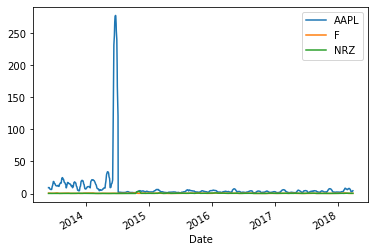

In [334]:
# Calculate rolling standard deviation
combined_rolling_std = combined_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

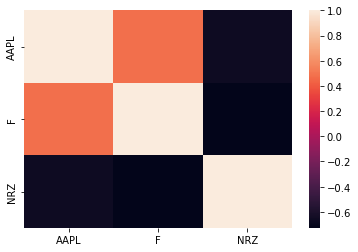

In [337]:
# Calculate and plot the correlation
correlation = combined_df.corr()
sns.heatmap(correlation)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [351]:
# Calculate and plot Beta
covariance1 = combined_df['AAPL'].cov(sp500_history_returns['SP500'])
covariance2 = combined_df['F'].cov(sp500_history_returns['SP500'])
covariance3 = combined_df['NRZ'].cov(sp500_history_returns['SP500'])
covariance = (covariance1+covariance2+covariance3)/3
variance = sp500_history_returns['SP500'].var()

variance

6.617241051948298e-05

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [379]:
# Calculate Annualized Sharpe Ratios
portfolio_sharp = (combined_returns.mean() / combined_df_std*np.sqrt(252))
portfolio_sharp = portfolio_sharp.mean()
portfolio_sharp
#sharpe_ratios.columns = ['Portfolio','Sharpe Ratio']
#sharpe_ratios.head(10)


0.00010210531202879866

<AxesSubplot:>

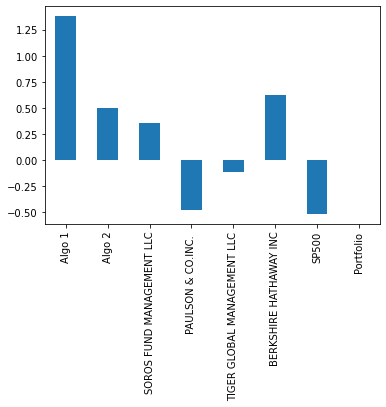

In [380]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios['Portfolio'] = portfolio_sharp
sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
Very poorly

In [381]:
sharpe_ratios.head(10)

Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
SP500                         -0.518582
Portfolio                      0.000102
dtype: float64